In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
# read in all the words
words = open("names.txt", "r").read().split()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
# build the vocabulary of characters and mappings to the integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
# training split, dev/validation split, test split
# 80%, 10%, 10%
def build_dataset(words):
  block_size = 3
  X, Y = [], []
  for w in words:

    context = [0] * block_size
    for ch in w + ".":
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
# <--------------- Clean Code !!! ----------------->

In [ ]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 12), generator = g, requires_grad= True)
W1 = torch.randn((36, 300), generator = g, requires_grad= True)
b1 = torch.randn(300, generator = g, requires_grad= True)
W2 = torch.randn((300, 27), generator = g, requires_grad= True)
b2 = torch.randn(27, generator = g, requires_grad= True)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum([p.nelement() for p in parameters]) # number of parameters in total

19551

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 2, 3)
  h = torch.tanh(emb.view(-1, 36) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix]) # (1)


  # backward
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

1.8189170360565186


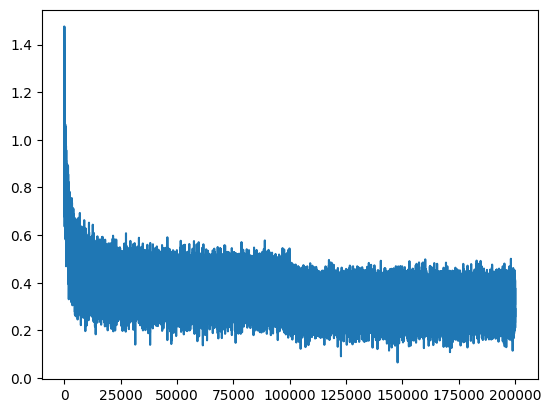

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
# dev test
emb = C[Xdev] # (32, 2, 3)
h = torch.tanh(emb.view(-1, 36) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev) # (1)
loss.item()

2.1610734462738037

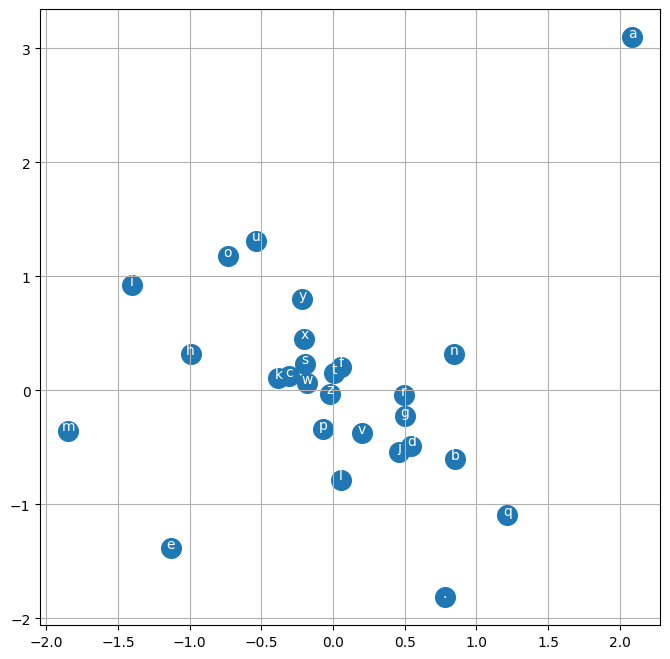

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 2].data, C[:, 3].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i, 2].item(), C[i, 3].item(), itos[i], ha="center", color="white")
plt.grid('minor')

In [ ]:
# sampling from the model


g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

  block_size = 3
  context = [0] * block_size # always start with ...
  out = []

  while(True):
    emb = C[torch.tensor(context)]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = torch.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]

    out.append(ix)
    if(ix == 0):
      break

  print(''.join(itos[i] for i in out))





mohanimyah.
seel.
ndunyah.
remmadgendraega.
zered.
elin.
shy.
jen.
eden.
lan.
nartelle.
malke.
cayshabergahimiel.
janie.
jennex.
ter.
foura.
ned.
ryy.
juliel.
